## 1. Color histogram

颜色直方图一般用于统计图片不同通道像素强度的分布，并可以基于此来实现对比度提升、以及简单的目标识别、跟踪以及分割等任务。在openCV中集成了函数`cv2.calcHist()`来实现直方图的计算。

函数定义如下:

```cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist```

- images:可为单张或多张图像的array
- channels:为要计算的通道数
- mask:为图像掩膜
- histSize:为直方图的柱子数量，即将数据分布在多少个区间上计数
- range:为直方图取值范围
- hist为返回值，不用填
- accumulate:多张图的时候是否叠加

In [ ]:
import cv2
hist = cv2.calcHist(img, [0], None, [256], [0.0,255.0]) #mask: None, histSize:256 range:[0.0, 255.0]

### Example

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('img.jpeg',0)  # 0表示读入灰度图像并显示
cv2.imshow('img',img)

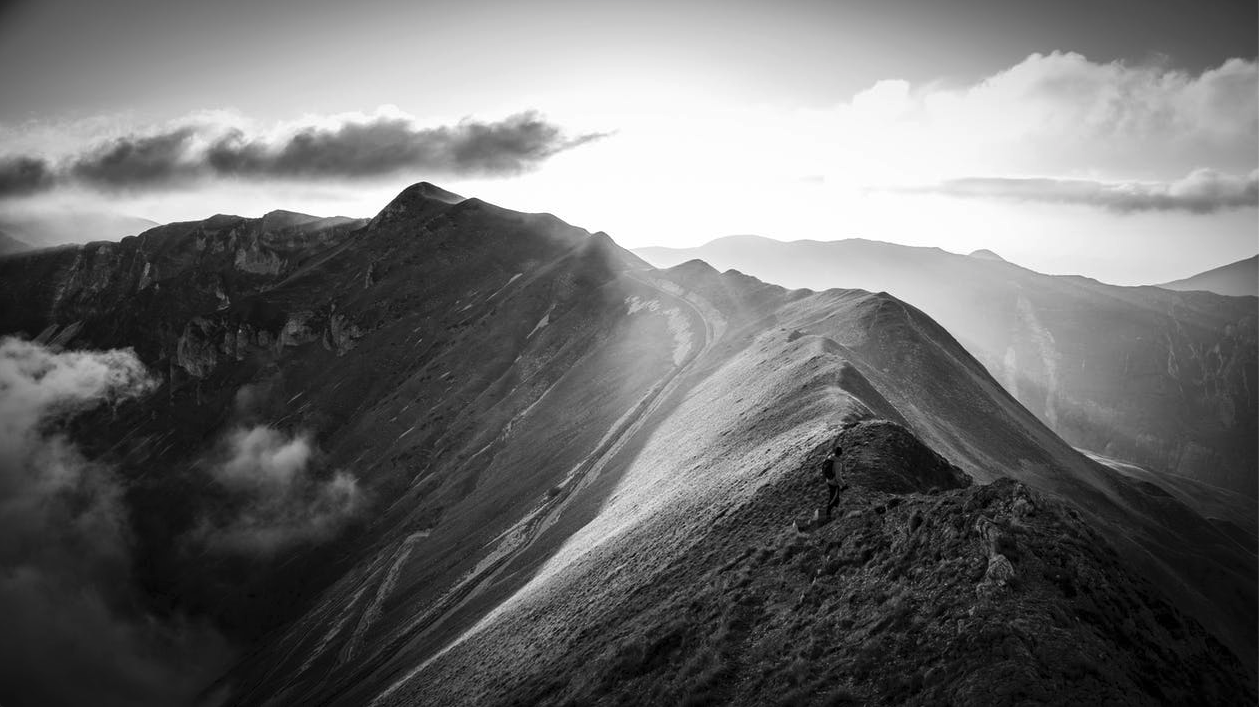

histrogram shape is (256, 1)


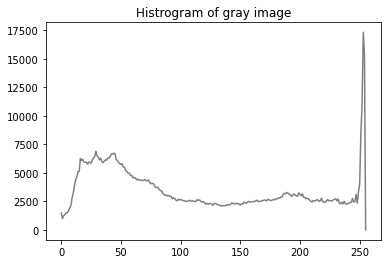

In [2]:
hist_255 = cv2.calcHist([img],[0], None, [256], [0.0,255.0])   #灰度图只有一个通道，通道0
#注意，img一定要加[],使其变成三维，否则则会使用第一维进行计算，即不加中括号会计算img[0,:]的直方分布

print('histrogram shape is',hist_255.shape)
plt.plot(hist_255,'gray')
plt.title('Histrogram of gray image')
plt.show()

从上面结果可以看到，其亮度主要集中在250附近，这是由于有大片的天空呈现白色，而暗区的峰值则来源于较暗的山体。

我们现在读入彩色图，并将rgb通道的颜色直方图分别画出来:

In [10]:
img = cv2.imread('img.jpeg')

In [ ]:
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

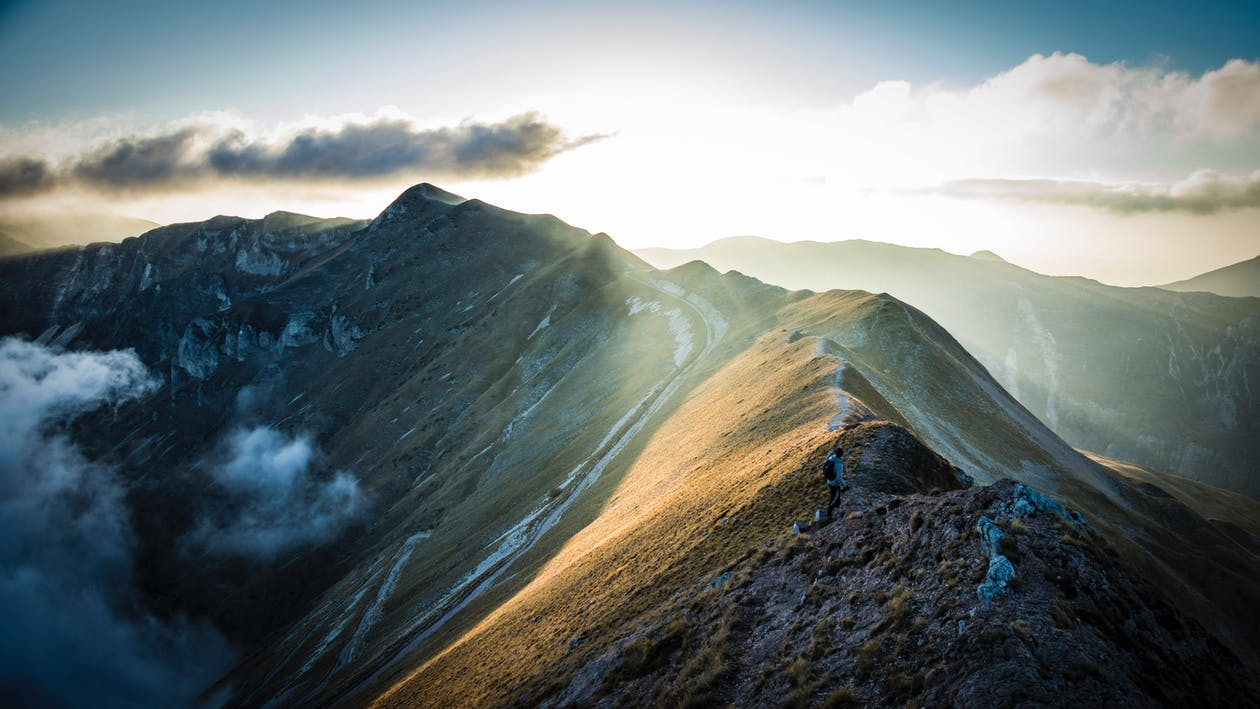

对三个通道分别遍历求直方图，注意opencv中的颜色按照**b, g, r**顺序。

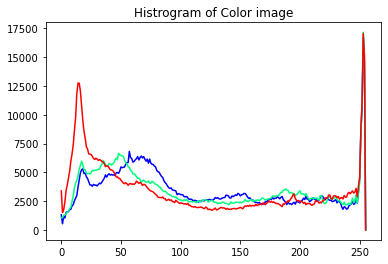

In [13]:
color = ['blue','springgreen','red']  #稍微调整显示颜色，提高可视化效果
for i in [0,1,2]:
    hist = cv2.calcHist([img],[i], None, [256], [0.0,255.0])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.show()

可以看到在低亮度区域红色比较多，对应了图中上体的反光和云彩的颜色。

可以改变区间分割的数量来得到更为平滑或者稠密的分布曲线:

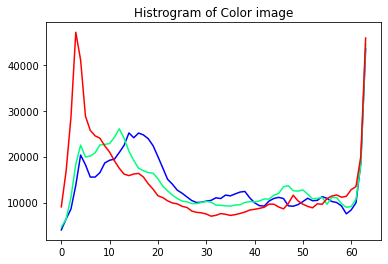

In [14]:
color = ['blue','springgreen','red']  #稍微调整显示颜色，提高可视化效果
for i in [0,1,2]:
    hist = cv2.calcHist([img],[i], None, [64], [0.0,256.0])   #用64端区间来统计0~256的灰度分布
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.show()

为了直观的查看每个通道的质量，我们画出各个通道的图像来与直方图对比：

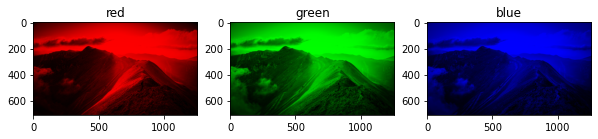

In [19]:
#画出各个通道查看，opencv中为bgr顺序
img_b = img.copy();img_b[:,:,2] = 0;img_b[:,:,1] = 0 #???
img_g = img.copy();img_g[:,:,2] = 0;img_g[:,:,0] = 0 #??
img_r = img.copy();img_r[:,:,0] = 0;img_r[:,:,1] = 0 #??

#转为rgb显示
plt.figure(figsize=(10,30))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img_r,cv2.COLOR_BGR2RGB))  #r
plt.title('red')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_g,cv2.COLOR_BGR2RGB))  #g
plt.title('green')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img_b,cv2.COLOR_BGR2RGB))  #b
plt.title('blue')
plt.show()

## 2.Equalization histogram

有的时候我们需要调整图像的对比度，让整幅图在各个取值区间的像素数变得更加均衡，就需要利用上面计算出的直方图进行直方图均衡。OpenCV中主要利用`cv2.equalizeHist()`来实现。

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img2= cv2.imread('img2.jpeg',0)

In [ ]:
# img from:https://www.pexels.com/photo/white-yacht-on-body-of-water-under-bridge-1529625/
cv2.imshow('img',img2)
cv2.waitKey()
cv2.destroyAllWindows()

可以看到这幅图的暗部和亮部分对比度不够好，每一部分像素分布过于集中了，在直方图中更为明显：

histrogram shape is (256, 1)


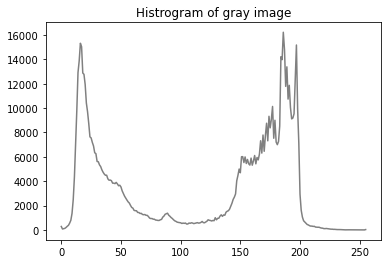

In [2]:
hist_255 = cv2.calcHist([img2],[0], None, [256], [0.0,256.0])   #灰度图只有一个通道，通道0
print('histrogram shape is',hist_255.shape)
plt.plot(hist_255,'gray')
plt.title('Histrogram of gray image')
plt.show()

下面我们进行直方图均衡化，然后查看对比度修正的结果：

histrogram shape is (256, 1)


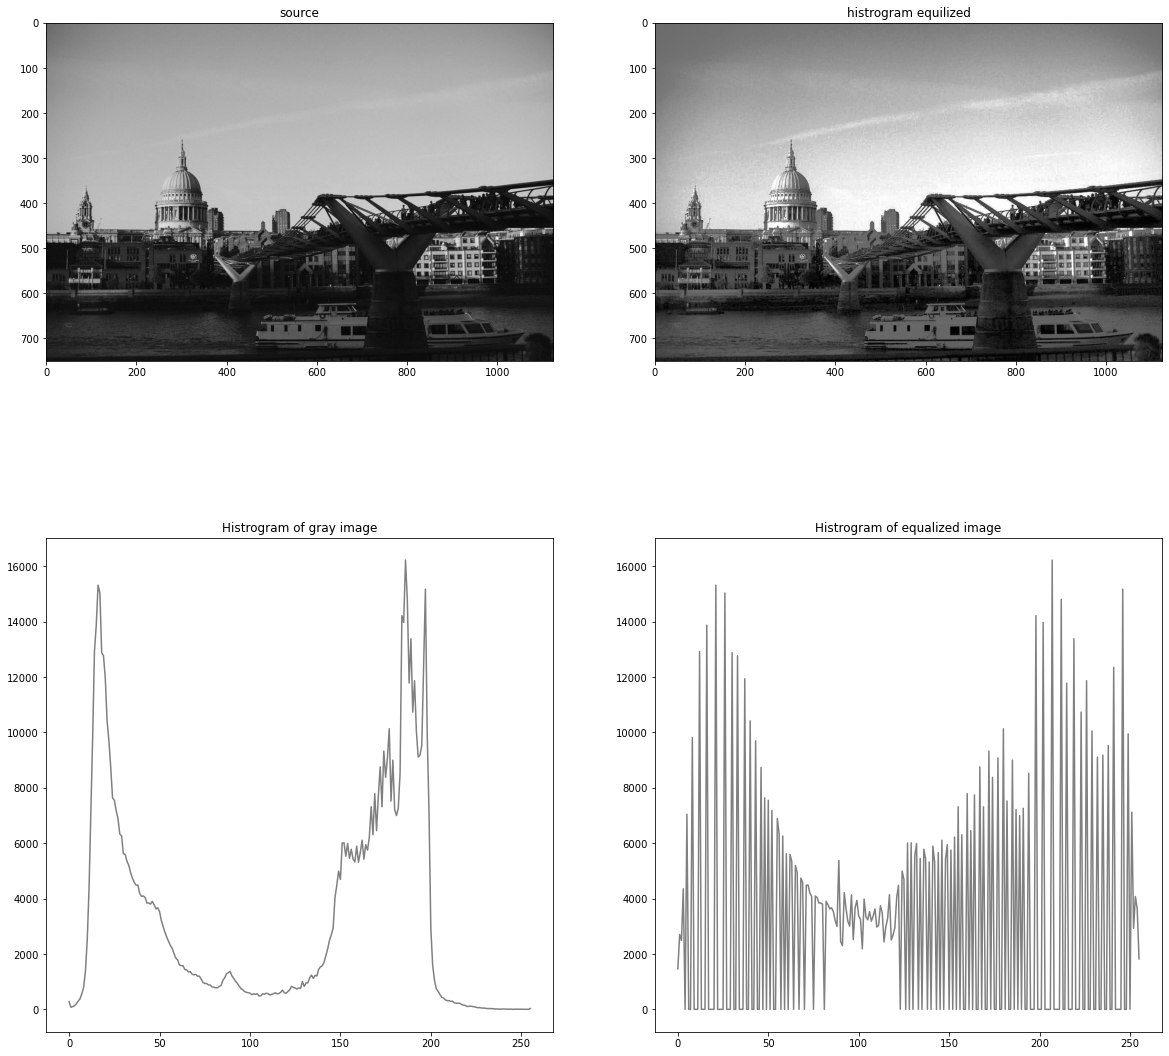

In [4]:
img_equal = cv2.equalizeHist(img2)
hist_255_equal = cv2.calcHist([img_equal],[0], None, [256], [0.0,256.0])   #灰度图只有一个通道，通道0
print('histrogram shape is',hist_255_equal.shape)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(img2,'gray')
plt.title('source')
plt.subplot(2,2,2)
plt.imshow(img_equal,'gray')
plt.title('histrogram equilized')
plt.subplot(2,2,3)
plt.plot(hist_255,'gray')
plt.title('Histrogram of gray image')
plt.subplot(2,2,4)
plt.plot(hist_255_equal,'gray')
plt.title('Histrogram of equalized image')
plt.show()

So basically histogram equalize is work with gray scaled images. so if you want to do histogram equalize at colorful image you can use this code.

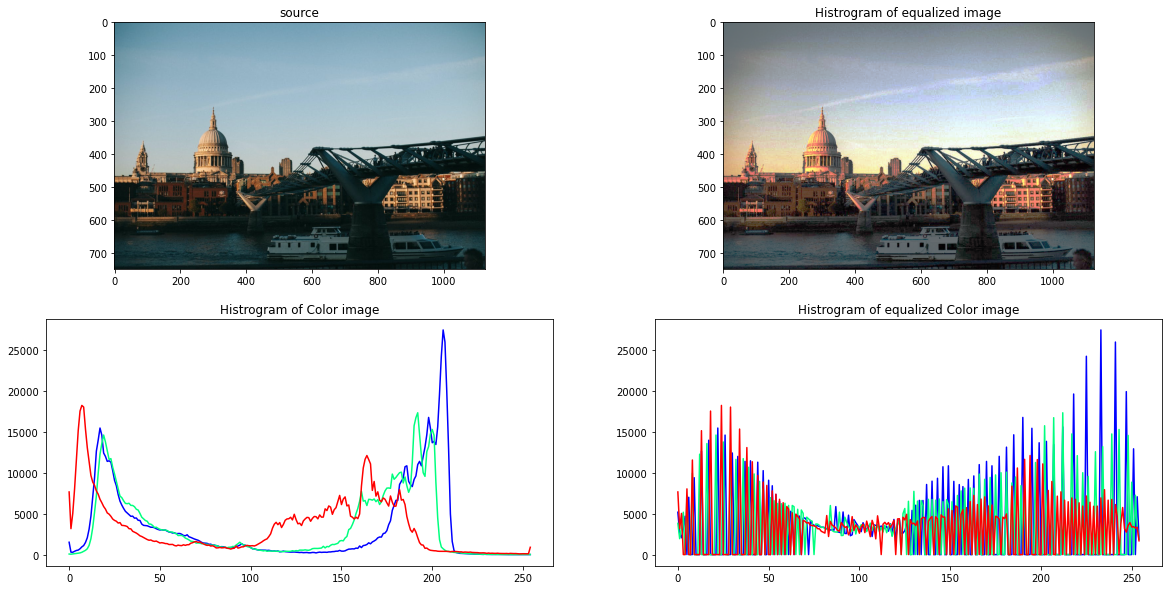

In [6]:
img2_color = cv2.imread('img2.jpeg')   #读入彩色图

img2_color_equl = img2_color.copy()
#需要按通道分别均衡化
img2_color_equl[:,:,0] = cv2.equalizeHist(img2_color[:,:,0])
img2_color_equl[:,:,1] = cv2.equalizeHist(img2_color[:,:,1])
img2_color_equl[:,:,2] = cv2.equalizeHist(img2_color[:,:,2])


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img2_color,cv2.COLOR_BGR2RGB))
plt.title('source')
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img2_color_equl,cv2.COLOR_BGR2RGB))
plt.title('Histrogram of equalized image')

plt.subplot(2,2,3)
color = ['blue','springgreen','red'] 
for i in [0,1,2]:
    hist = cv2.calcHist([img2_color],[i], None, [255], [0.0,256.0])   #彩色图三通道
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.subplot(2,2,4)
for i in [0,1,2]:
    hist = cv2.calcHist([img2_color_equl],[i], None, [255], [0.0,256.0])   #彩色图
    plt.plot(hist, color[i])
    plt.title('Histrogram of equalized Color image')
plt.show()